## Pre-processing and Training Data Development
This is the forth step in the Data Science Method. In this exercise, you will build the data inorder to fit models
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
  * Outliers
 
3.   Exploratory Data Analysis 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   **Pre-processing and Training Data Development**
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load clean data from previous step

Also check data type and sync it based on analysis on previous step

<img src = 'Data_desc.png'>

<img src = 'Data_desc_cat.png'>

In [2]:
path = 'C:/Users/sanja/Jupyter Code/Git Hub/Online-Shopper-Intention-Capstone/'
filename = 'data/clean_data2.csv'
df = pd.read_csv(path+filename)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11233 entries, 0 to 11232
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11233 non-null  int64  
 1   Administrative_Duration  11233 non-null  float64
 2   Informational            11233 non-null  int64  
 3   Informational_Duration   11233 non-null  float64
 4   ProductRelated           11233 non-null  int64  
 5   ProductRelated_Duration  11233 non-null  float64
 6   BounceRates              11233 non-null  float64
 7   ExitRates                11233 non-null  float64
 8   PageValues               11233 non-null  float64
 9   SpecialDay               11233 non-null  float64
 10  Month                    11233 non-null  object 
 11  OperatingSystems         11233 non-null  int64  
 12  Browser                  11233 non-null  int64  
 13  Region                   11233 non-null  int64  
 14  TrafficType           

In [4]:
# categorical feature
#df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11233 entries, 0 to 11232
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11233 non-null  int64  
 1   Administrative_Duration  11233 non-null  float64
 2   Informational            11233 non-null  int64  
 3   Informational_Duration   11233 non-null  float64
 4   ProductRelated           11233 non-null  int64  
 5   ProductRelated_Duration  11233 non-null  float64
 6   BounceRates              11233 non-null  float64
 7   ExitRates                11233 non-null  float64
 8   PageValues               11233 non-null  float64
 9   SpecialDay               11233 non-null  float64
 10  Month                    11233 non-null  object 
 11  OperatingSystems         11233 non-null  object 
 12  Browser                  11233 non-null  object 
 13  Region                   11233 non-null  object 
 14  TrafficType           

## Dealing with Categorical Variables

In [6]:
cat_name = df.select_dtypes(include = ['object']).columns
print(cat_name)

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')


In [7]:
for i in cat_name:
    print(i, df[i].nunique())
    print(df[i].value_counts())

Month 10
May     3166
Nov     2524
Mar     1790
Dec     1597
Oct      507
Sep      412
Jul      398
Aug      398
June     262
Feb      179
Name: Month, dtype: int64
OperatingSystems 8
2    5849
1    2453
3    2389
4     439
8      73
6      18
7       6
5       6
Name: OperatingSystems, dtype: int64
Browser 13
2     7139
1     2323
4      679
5      429
6      166
10     145
8      133
3      104
13      54
7       44
12      10
11       6
9        1
Name: Browser, dtype: int64
Region 9
1    4280
3    2200
4    1090
2    1047
6     747
7     708
9     470
8     401
5     290
Name: Region, dtype: int64
TrafficType 20
2     3493
1     2160
3     1921
4     1020
13     660
6      413
10     413
8      321
5      251
11     239
20     187
9       40
7       38
15      35
19      16
14      11
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
VisitorType 3
Returning_Visitor    9481
New_Visitor          1674
Other                  78
Name: VisitorType, dtype: int64


In [8]:
#One hot encoding 'VisitorType'

df_enc = pd.concat([df.drop('VisitorType', axis = 1),pd.get_dummies(df['VisitorType'],prefix = 'VT')],axis = 1)
df_enc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


In [9]:
#One hash encoding 'Month'

encoder=ce.HashingEncoder(cols='Month',n_components=3)
df_enc = encoder.fit_transform(df_enc)
df_enc.head()

,col_0,col_1,col_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor
0,0,1,0,0,0.0,0,0.0,1,0.000000,0.20,...,0.0,1,1,1,1,False,False,0,0,1
1,0,1,0,0,0.0,0,0.0,2,64.000000,0.00,...,0.0,2,2,1,2,False,False,0,0,1
2,0,1,0,0,-1.0,0,-1.0,1,-1.000000,0.20,...,0.0,4,1,9,3,False,False,0,0,1
3,0,1,0,0,0.0,0,0.0,2,2.666667,0.05,...,0.0,3,2,2,4,False,False,0,0,1
4,0,1,0,0,0.0,0,0.0,10,627.500000,0.02,...,0.0,3,3,1,4,True,False,0,0,1


In [10]:
df_enc.rename(columns={'col_0': 'Month_0','col_1': 'Month_1','col_2': 'Month_2'},inplace = True)

df_enc.columns

Index(['Month_0', 'Month_1', 'Month_2', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'Weekend', 'Revenue', 'VT_New_Visitor', 'VT_Other',
       'VT_Returning_Visitor'],
      dtype='object')

In [11]:
#One hot encoding 'OperatingSystems'

df_enc = pd.concat([df_enc.drop('OperatingSystems', axis = 1),pd.get_dummies(df_enc['OperatingSystems'],prefix = 'OS')],axis = 1)
df_enc.head()

,Month_0,Month_1,Month_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,VT_Other,VT_Returning_Visitor,OS_1,OS_2,OS_3,OS_4,OS_5,OS_6,OS_7,OS_8
0,0,1,0,0,0.0,0,0.0,1,0.000000,0.20,...,0,1,1,0,0,0,0,0,0,0
1,0,1,0,0,0.0,0,0.0,2,64.000000,0.00,...,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,-1.0,0,-1.0,1,-1.000000,0.20,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0.0,0,0.0,2,2.666667,0.05,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0.0,0,0.0,10,627.500000,0.02,...,0,1,0,0,1,0,0,0,0,0


In [12]:
#One hot encoding 'Browser'

df_enc = pd.concat([df_enc.drop('Browser', axis = 1),pd.get_dummies(df_enc['Browser'],prefix = 'Bro')],axis = 1)
df_enc.head()

,Month_0,Month_1,Month_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,Bro_4,Bro_5,Bro_6,Bro_7,Bro_8,Bro_9,Bro_10,Bro_11,Bro_12,Bro_13
0,0,1,0,0,0.0,0,0.0,1,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0.0,0,0.0,2,64.000000,0.00,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,-1.0,0,-1.0,1,-1.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0.0,0,0.0,2,2.666667,0.05,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0.0,0,0.0,10,627.500000,0.02,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#One hot encoding 'Region'

df_enc = pd.concat([df_enc.drop('Region', axis = 1),pd.get_dummies(df_enc['Region'],prefix = 'Reg')],axis = 1)
df_enc.head()

,Month_0,Month_1,Month_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,Bro_13,Reg_1,Reg_2,Reg_3,Reg_4,Reg_5,Reg_6,Reg_7,Reg_8,Reg_9
0,0,1,0,0,0.0,0,0.0,1,0.000000,0.20,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0.0,0,0.0,2,64.000000,0.00,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,-1.0,0,-1.0,1,-1.000000,0.20,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0.0,0,0.0,2,2.666667,0.05,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0.0,0,0.0,10,627.500000,0.02,...,0,1,0,0,0,0,0,0,0,0


In [14]:
#One hot encoding 'TrafficType'

df_enc = pd.concat([df_enc.drop('TrafficType', axis = 1),pd.get_dummies(df_enc['TrafficType'],prefix = 'TT')],axis = 1)
df_enc.head()

,Month_0,Month_1,Month_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,TT_11,TT_12,TT_13,TT_14,TT_15,TT_16,TT_17,TT_18,TT_19,TT_20
0,0,1,0,0,0.0,0,0.0,1,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0.0,0,0.0,2,64.000000,0.00,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,-1.0,0,-1.0,1,-1.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0.0,0,0.0,2,2.666667,0.05,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0.0,0,0.0,10,627.500000,0.02,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_enc.columns

Index(['Month_0', 'Month_1', 'Month_2', 'Administrative',
       'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Weekend', 'Revenue', 'VT_New_Visitor',
       'VT_Other', 'VT_Returning_Visitor', 'OS_1', 'OS_2', 'OS_3', 'OS_4',
       'OS_5', 'OS_6', 'OS_7', 'OS_8', 'Bro_1', 'Bro_2', 'Bro_3', 'Bro_4',
       'Bro_5', 'Bro_6', 'Bro_7', 'Bro_8', 'Bro_9', 'Bro_10', 'Bro_11',
       'Bro_12', 'Bro_13', 'Reg_1', 'Reg_2', 'Reg_3', 'Reg_4', 'Reg_5',
       'Reg_6', 'Reg_7', 'Reg_8', 'Reg_9', 'TT_1', 'TT_2', 'TT_3', 'TT_4',
       'TT_5', 'TT_6', 'TT_7', 'TT_8', 'TT_9', 'TT_10', 'TT_11', 'TT_12',
       'TT_13', 'TT_14', 'TT_15', 'TT_16', 'TT_17', 'TT_18', 'TT_19', 'TT_20'],
      dtype='object')

## Dealing with Non - Categorical Variables

In [16]:
df_enc.describe()

,Month_0,Month_1,Month_2,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,TT_11,TT_12,TT_13,TT_14,TT_15,TT_16,TT_17,TT_18,TT_19,TT_20
count,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,...,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000
mean,0.194783,0.119826,0.685391,2.046025,70.460222,0.396421,25.018867,23.305795,796.561459,0.021643,...,0.021277,0.000089,0.058755,0.000979,0.003116,0.000267,0.000089,0.000890,0.001424,0.016647
std,0.396051,0.324772,0.464381,2.949437,152.068255,1.044749,111.308646,23.061285,796.265484,0.047070,...,0.144311,0.009435,0.235177,0.031279,0.055735,0.016341,0.009435,0.029825,0.037716,0.127952
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,169.966667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,16.000000,528.196429,0.002222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,82.850000,0.000000,0.000000,32.000000,1202.750000,0.017857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,21.000000,2156.166667,10.000000,2252.033333,179.000000,3401.300000,0.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
non_cat_name = df.select_dtypes(exclude = ['object','bool']).columns
print(non_cat_name)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')


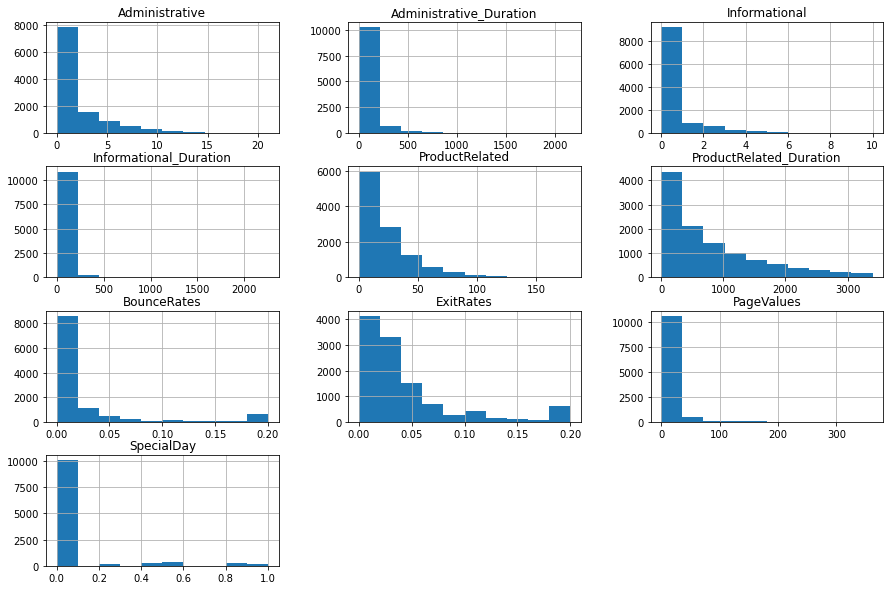

In [18]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

## Standardization

In [19]:
scaler = StandardScaler()
df_enc[non_cat_name] = scaler.fit_transform(df_enc[non_cat_name])

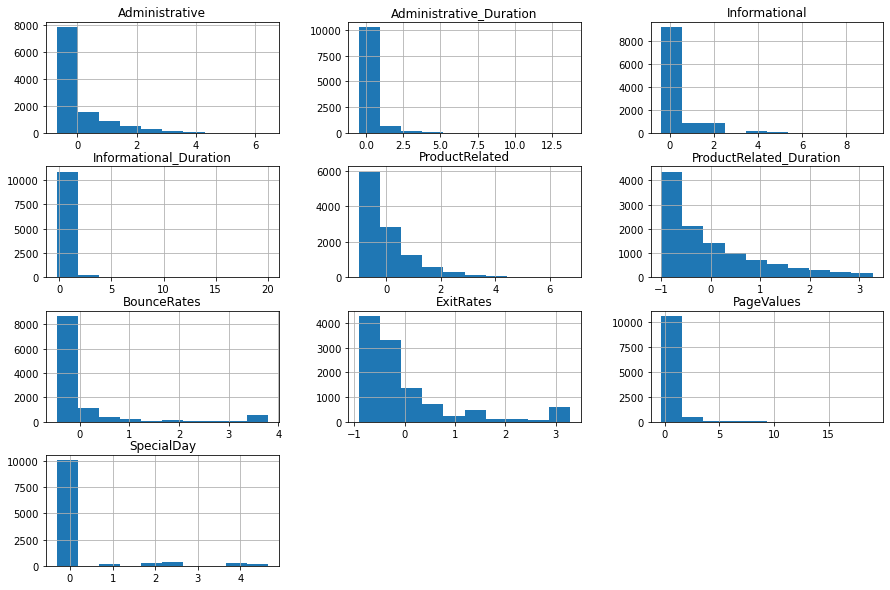

In [20]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

In [21]:
X = df_enc.drop(['Revenue'], axis=1)
y = df_enc.Revenue

y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, random_state=1)